# K-Means Clustering for dominant colors in the image

First let's get imports out of the way. We are going to use the default implementation of the k-means algorithm from sklearn, 

In [1]:
# import the necessary packages
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2

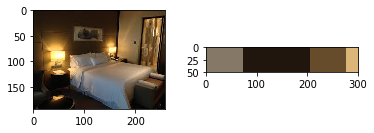

In [2]:
# specifies the number of 'dominant colors' to be shown
clusters = 4

# load the image and convert it from BGR to RGB so that
# we can dispaly it with matplotlib
image = cv2.imread('/home/miki/Desktop/index.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def generateHistogram(clt):
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins = numLabels)
 
    # normalize the histogram, such that it sums to one
    hist = hist.astype("float")
    hist /= hist.sum()
 
    # return the histogram
    return hist

def plot(hist, centroids):
    # initialize the bar chart representing the relative frequency
    # of each of the colors
    bar = np.zeros((50, 300, 3), dtype = "uint8")
    startX = 0

    # loop over the percentage of each cluster and the color of
    # each cluster
    for (percent, color) in zip(hist, centroids):
    # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
        color.astype("uint8").tolist(), -1)
        startX = endX
    return bar
 
# reshape the image to be a list of pixels
fitim = image.reshape((image.shape[0] * image.shape[1], 3))

# cluster the pixel intensities
clt = KMeans(n_clusters = clusters)
clt.fit(fitim)

hist = generateHistogram(clt)
bar = plot(hist, clt.cluster_centers_)

# show our image
plt.axis("off")
plt.subplot(221)
plt.imshow(image)
plt.subplot(222)
plt.imshow(bar)
plt.show()

# Detect the brightest spot in the image

In [3]:
import numpy as np
import cv2

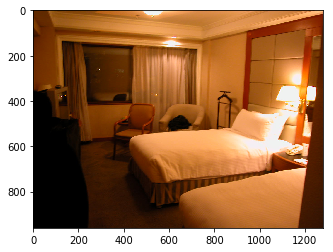

In [4]:
# the area of the image with the largest intensity value
imageB = cv2.imread('/home/miki/Desktop/hotel_room.JPG')
RGB_img = cv2.cvtColor(imageB, cv2.COLOR_RGB2BGR)
origB = RGB_img.copy()
grayB = cv2.cvtColor(RGB_img, cv2.COLOR_BGR2GRAY)

(minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(grayB)
cv2.circle(origB, maxLoc, 5, (255, 0, 0), 2)
 
# display the results of the naive attempt
plt.imshow(RGB_img)
plt.show()

# Detecting multiple bright spots in an image

In [5]:
from imutils import contours
from skimage import measure
import numpy as np
import imutils
import cv2

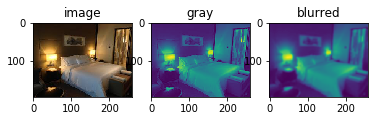

In [6]:
image2 = cv2.imread('/home/miki/Desktop/index.jpeg')
image2 = cv2.cvtColor(image2, cv2.COLOR_RGB2BGR)
gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (11, 11), 0)

plt.subplot(231)
plt.title('image')
plt.imshow(image)
plt.subplot(232)
plt.title('gray')
plt.imshow(gray)
plt.subplot(233)
plt.title('blurred')
plt.imshow(blurred)
plt.show()

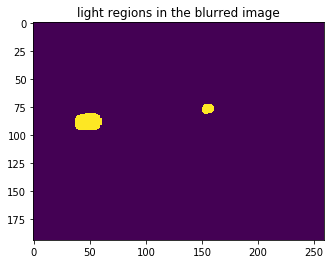

In [7]:
# threshold the image to reveal light regions in the
# blurred image
tresh = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)[1]
plt.title('light regions in the blurred image')
plt.imshow(tresh)
plt.show()

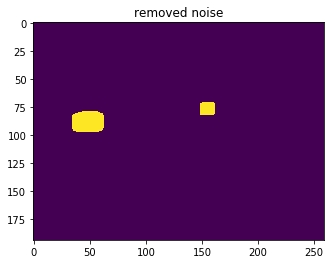

In [8]:
tresh = cv2.erode(tresh, None, iterations=2)
tresh = cv2.dilate(tresh, None, iterations=4)

plt.title('removed noise')
plt.imshow(tresh)
plt.show()

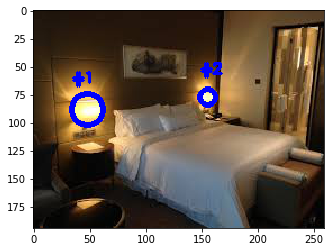

In [9]:
labels = measure.label(tresh, neighbors=8, background=0)
mask = np.zeros(tresh.shape, dtype="uint8")
 
# loop over the unique components
for label in np.unique(labels):
    # if this is the background label, ignore it
    if label == 0:
        continue
 
    # otherwise, construct the label mask and count the
    # number of pixels 
    labelMask = np.zeros(tresh.shape, dtype="uint8")
    labelMask[labels == label] = 255
    numPixels = cv2.countNonZero(labelMask)
 
    # if the number of pixels in the component is sufficiently
    # large, then add it to our mask of "large blobs"
    if numPixels > 100:
        mask = cv2.add(mask, labelMask)
cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]
cnts = contours.sort_contours(cnts)[0]
 
# loop over the contours
for (i, c) in enumerate(cnts):
    # draw the bright spot on the image
    (x, y, w, h) = cv2.boundingRect(c)
    ((cX, cY), radius) = cv2.minEnclosingCircle(c)
    cv2.circle(image, (int(cX), int(cY)), int(radius),
        (0, 0, 255), 3)
    cv2.putText(image, "#{}".format(i + 1), (x, y - 15),
    cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
 
# show the output image
plt.imshow(image)
plt.show()

# Center of countour

In [10]:
import imutils
import cv2

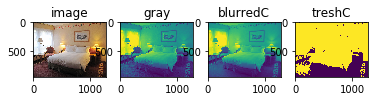

In [20]:
imageC = cv2.imread('/home/miki/Desktop/countour.jpg')
cc = cv2.cvtColor(imageC, cv2.COLOR_RGB2BGR)
grayC = cv2.cvtColor(cc, cv2.COLOR_BGR2GRAY)
blurredC = cv2.GaussianBlur(grayC, (5, 5), 0)
treshC = cv2.threshold(blurredC, 60, 255, cv2.THRESH_BINARY)[1]

plt.subplot(141)
plt.title('image')
plt.imshow(c)
plt.subplot(142)
plt.title('gray')
plt.imshow(grayC)
plt.subplot(143)
plt.title('blurredC')
plt.imshow(blurred)
plt.subplot(144)
plt.title('treshC')
plt.imshow(treshC)
plt.show()

ZeroDivisionError: float division by zero